In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

using Plots

  Activating project at `~/Documents/GitHub/Phys215-202223-1/00-Intro`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Manifest.toml`


# Logistic return map chaos

Chaos is the sensitivity of a system to initial condition.
One of the simplest system that exhibits chaos is the [Logistic Map](https://en.wikipedia.org/wiki/Logistic_map).
The logistic map is a discrete-time (iteration based) relation of the quantity being such that:
$$x_{t+1} = f(x_{t})$$
where the $f(x_{t})$ is the function that provides the new value of $x$ at a later time $t+1$ given the state at $t$.
In general, $x_t$ may be a vector.

For simplicity, we choose a one-dimensional chaotic system:
$$x_{t+1} = rx_t(1-x_t)$$
where $x_t$ is most commonly associated with a self-limiting growth of a system (e.g. population, mass, etc).

# Implementation

One intuitive way to implement this is to create a vector, say `x` from length one (or length zero) such that `x = [x_1]` (or `x = []`) with `x_1` as the first value.
The following gives the one that starts with length zero.

In [13]:
r = 3.7 # parameter

x = [ rand() ] # Start with a vector with initial value. Random value.

1-element Vector{Float64}:
 0.5111531642079139

Since the process involves updating of a former value, it is also important to set a variable for both the new and avoid serial update of variables.

In [14]:
# Let's try again..
xnew = rand()
x = [ xnew ] # Start.

# Mapping again..
xold = xnew # Ensure no serial update; Not necessary for 1D such as this
xnew = r*xold*(1-xold)
x = vcat(x,xnew) # Append to the last

2-element Vector{Float64}:
 0.7748772569330951
 0.6454372263974678

In [15]:
# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = vcat(x,xnew);
end

In [16]:
@show length(x);

length(x) = 202


# Plot of results

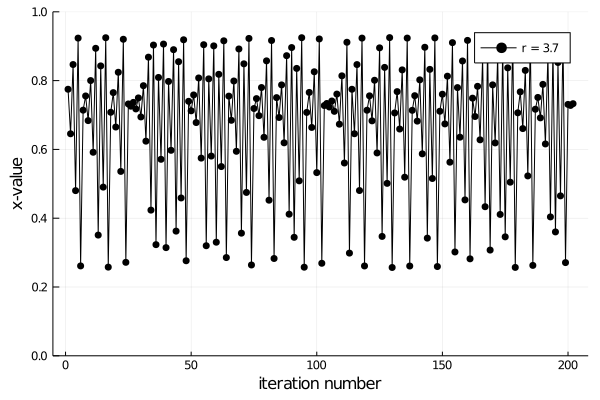

In [17]:
plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Again..

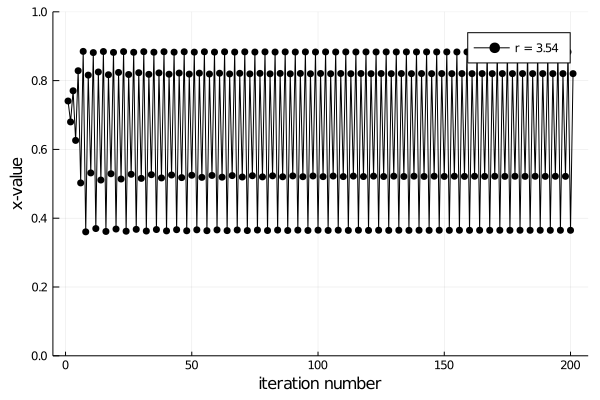

In [18]:
xnew = rand()
x = [ xnew ] # Start.

r = 3.54

# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = vcat(x,xnew);
end

plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Packaging procedures as one function

_Object Oriented Programming (OOP) vs Julia programming_ is a topic that is important to distinguish.
Moving from `c` to `c++` (or `Java`) to `Python` makes a lot of difference.

[OOP paradigm](https://en.wikipedia.org/wiki/Object-oriented_programming#Features) --as usual in `Python` (strictly in `Java`)-- is important for three principles: (1) encapsulation, (2) inheritance, and (3) polymorphism.
While different from the classical OOP, the _Julia paradigm_ also provides a different kind of implementing the same principles.

One can think [Julia](https://en.wikipedia.org/wiki/Julia_(programming_language)) as a procedure-(or methods-)based programming (functional programming) due to the inherent use of functions and variables.
However, unlike the typical `c` programming paradigm, Julia considers everything as an object.
Julia, also reflects reality by way of using _prototype_ for all variables.
Other [features]("https://en.wikipedia.org/wiki/Julia_(programming_language)#Language_features") are listed in the Wiki entry.

All Julia Functions are objects that processes other objects (including Functions themselves0.
Here, we use Functions to package a set of procedures done to a given set of objects (parameters are objects, too).

Since we would like to use `generate()` as the function name, our defition should not clash with any existing one.

In [19]:
? generate

search: generate @generated



No documentation found.

`generate` is a `Function`.

```
# 2 methods for generic function "generate":
[1] generate(r) in Main at In[8]:18
[2] generate(r, N) in Main at In[8]:7
```


In [20]:
# input:
#   r::Float
#   N::Integer
# output:
#   x::Vector

function generate( r, N )
    # generating first entry..
    xval = rand();
    x = [ xval ];
    for _ in 2:N
        xval = r * xval * (1 - xval)
        x = vcat(x, xval)
    end
    return x;
end

generate( r ) = generate( r, 200 ) # default to N = 200

generate (generic function with 2 methods)

In [21]:
x = generate( 3.75 )

200-element Vector{Float64}:
 0.2892453362760683
 0.7709342689447967
 0.6622298321675573
 0.8388055558308232
 0.5070404825181261
 0.9373141185221698
 0.22033635652941597
 0.6442059244528427
 0.8595174425726287
 0.4528020318226372
 0.9291463192497326
 0.24687538752902483
 0.6972297396053199
 ⋮
 0.8247220401669808
 0.5420834873617264
 0.9308586753430329
 0.24135300705617613
 0.6866314989041907
 0.8068825635629064
 0.5843365956789701
 0.9108275198598073
 0.30457780847189875
 0.794288126468828
 0.6127293698230016
 0.8898453344224084

In [22]:
function plotLogistic( r, N )
    x = generate(r,N)
    plt = plot( x
        ,markershape=:circle, markercolor=:black
        ,linecolor=:black
        ,label="r = "*string(r)
        ,xlabel="iteration number"
        ,ylabel="x-value"
        ,ylim=(0,1)
    )
    return plt
end

plotLogistic(r) = plotLogistic(r,200)

plotLogistic (generic function with 2 methods)

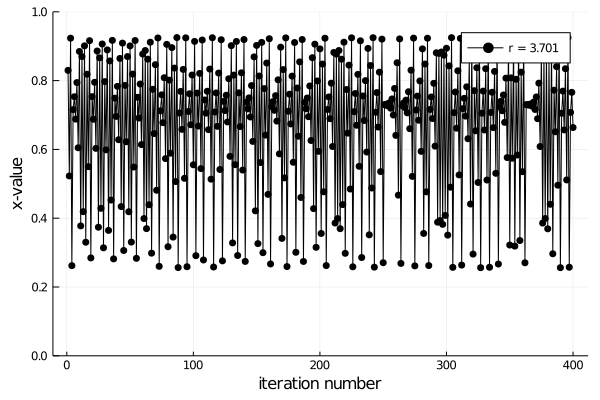

In [23]:
plotLogistic( 3.701, 400 )

# Fin